We will be analyzing restaurant data from the different restaurants we specified in Progress Report #1.

In [1]:
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from scipy.stats import mannwhitneyu
nltk.download('all')

/Users/aimeeoh/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/aimeeoh/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (
/Users/aimeeoh/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/aimeeoh/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading pac

True

In [3]:
data = pd.read_csv('data/Raku.csv')

df = data[['place_name', 'rating', 'review_text', 'published_at_date']]
df

,place_name,rating,review_text,published_at_date
0,Raku,4,Nice!,2024-04-23 23:46:34.972828
1,Raku,5,My family and I were on our way to another res...,2024-04-23 15:46:34.976627
2,Raku,5,I prefer this location over the East Village l...,2024-04-22 15:46:34.980000
3,Raku,1,I ve been there many times. Always very disapp...,2024-04-21 15:46:34.981978
4,Raku,5,NaN,2024-04-20 15:46:34.983584
...,...,...,...,...
2395,Raku,4,A very simple and effective menu of japanese s...,2016-04-24 15:49:00.894527
2396,Raku,5,The Bees Knees!! Youll enjoy everything on the...,2016-04-24 15:49:00.896131
2397,Raku,5,NaN,2016-04-24 15:49:00.897816
2398,Raku,4,Wonderful udon and minimalist dining room,2016-04-24 15:49:00.899599


Extracting Year from 'published_at_date' column

In [4]:
df['published_at_date'] = pd.to_datetime(df['published_at_date']).dt.year
df

/var/folders/h6/vygxj7rj5tq9z54ggx6zd6080000gn/T/ipykernel_91268/2592446673.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['published_at_date'] = pd.to_datetime(df['published_at_date']).dt.year


,place_name,rating,review_text,published_at_date
0,Raku,4,Nice!,2024
1,Raku,5,My family and I were on our way to another res...,2024
2,Raku,5,I prefer this location over the East Village l...,2024
3,Raku,1,I ve been there many times. Always very disapp...,2024
4,Raku,5,NaN,2024
...,...,...,...,...
2395,Raku,4,A very simple and effective menu of japanese s...,2016
2396,Raku,5,The Bees Knees!! Youll enjoy everything on the...,2016
2397,Raku,5,NaN,2016
2398,Raku,4,Wonderful udon and minimalist dining room,2016


Charts for ratings

<AxesSubplot:xlabel='rating'>

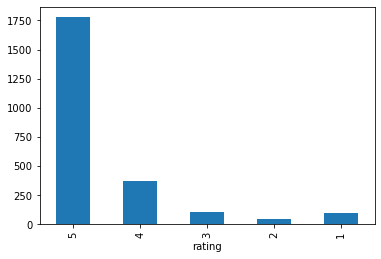

In [5]:
df['rating'].value_counts()[[5, 4, 3, 2, 1]].plot(kind='bar')

<AxesSubplot:title={'center':'Restaurant Ratings'}, ylabel='count'>

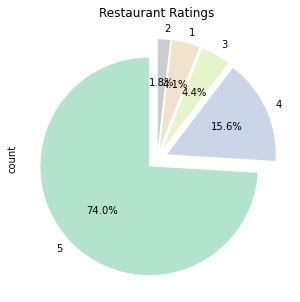

In [6]:
kwargs = dict(
    startangle = 90,
    colormap   = 'Pastel2',
    fontsize   = 10,
    explode    = (0.1,0.1,0.1,0.1,0.1),
    figsize    = (60,5),
    autopct    = '%1.1f%%',
    title      = 'Restaurant Ratings'
)

df['rating'].value_counts().plot.pie(**kwargs)

OptionError: "No such keys(s): 'mode.use_inf_as_null'"

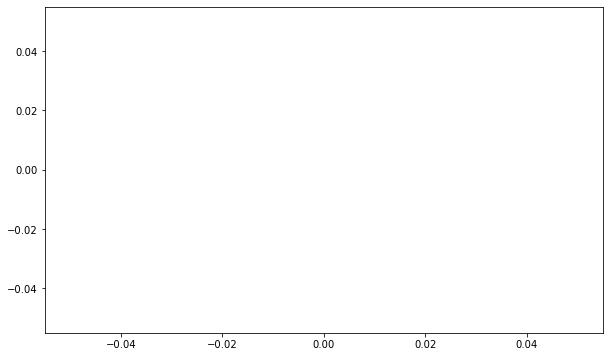

In [6]:
rating_counts = df.groupby(['published_at_date', 'rating']).size().unstack(fill_value=0)

total_ratings_per_year = rating_counts.sum(axis=1)

plt.figure(figsize=(10, 6))
sns.lineplot(data=total_ratings_per_year, marker='o', color='skyblue', linewidth=2.5)
plt.axvline(x=2016, color='blue', linestyle='--', label='Year 2016')


plt.title('Total Count of Ratings Over Time by Year')
plt.xlabel('Year')
plt.ylabel('Total Count of Ratings')
plt.tight_layout()
plt.show()

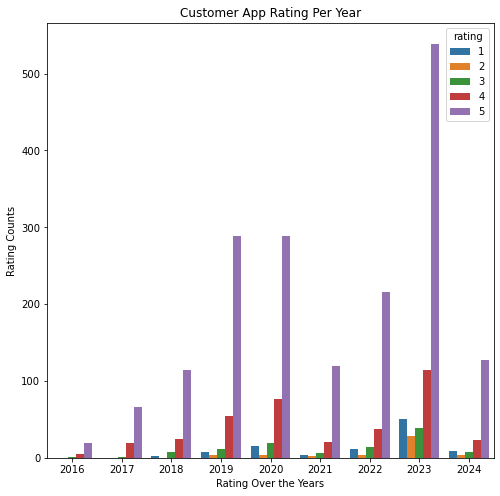

In [7]:
plt.figure(figsize=(8, 8))
sns.countplot(x = 'published_at_date', hue ='rating', data = df)
plt.title('Customer App Rating Per Year')
plt.xlabel("Rating Over the Years")
plt.ylabel('Rating Counts')
plt.show()

In [8]:
df['review_text'] = df['review_text'].astype("string")

df[['review_text']]

/var/folders/h6/vygxj7rj5tq9z54ggx6zd6080000gn/T/ipykernel_91268/2693296585.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review_text'] = df['review_text'].astype("string")


,review_text
0,Nice!
1,My family and I were on our way to another res...
2,I prefer this location over the East Village l...
3,I ve been there many times. Always very disapp...
4,<NA>
...,...
2395,A very simple and effective menu of japanese s...
2396,The Bees Knees!! Youll enjoy everything on the...
2397,<NA>
2398,Wonderful udon and minimalist dining room


In [9]:
import re
from nltk.stem import WordNetLemmatizer, PorterStemmer, SnowballStemmer
stop_words_file = 'Stopwords.txt'

stop_words = []

with open(stop_words_file, "r") as f:
    for line in f:
        stop_words.extend(line.split()) 
        
stop_words = stop_words  

def preprocess(raw_text):
    
    #regular expression keeping only letters 
    letters_only_text = re.sub("[^a-zA-Z]", " ", raw_text)

    # convert to lower case and split into words -> convert string into list ( 'hello world' -> ['hello', 'world'])
    words = letters_only_text.lower().split()

    cleaned_words = []
    lemmatizer = PorterStemmer() #plug in here any other stemmer or lemmatiser you want to try out
    
    # remove stopwords
    for word in words:
        if word not in stop_words:
            cleaned_words.append(word)
    
    # stemm or lemmatise words
    stemmed_words = []
    for word in cleaned_words:
        word = lemmatizer.stem(word)   #dont forget to change stem to lemmatize if you are using a lemmatizer
        stemmed_words.append(word)
    
    # converting list back to string
    return " ".join(stemmed_words)

In [10]:
test_sentence = "Service was excellent, food was delicious, and vibe was great ! We got the korean style boneless fried chicken (sweet chili sauce was fire), veg buckwheat pancake, and spicy chicken. Our server was so kind and attentive & we had a great experience; the sweet treat cookie at end was so cute :)"

preprocess(test_sentence)

'servic excel food delici vibe great korean style boneless fri chicken sweet chili sauc fire veg buckwheat pancak spici chicken server kind attent great experi sweet treat cooki end cute'

In [10]:
prep = []

for text in df['review_text']:
    if pd.isna(text):
        prep.append('')
    else:
        prep.append(preprocess(text))

df['prep'] = prep

df.head()

/var/folders/h6/vygxj7rj5tq9z54ggx6zd6080000gn/T/ipykernel_91268/1628437642.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['prep'] = prep


,place_name,rating,review_text,published_at_date,prep
0,Raku,4,Nice!,2024,nice
1,Raku,5,My family and I were on our way to another res...,2024,famili restaur smell broth lure raku kitsun ud...
2,Raku,5,I prefer this location over the East Village l...,2024,prefer locat east villag locat didnt reserv sa...
3,Raku,1,I ve been there many times. Always very disapp...,2024,ve time disappoint servic food great waitstaff...
4,Raku,5,<NA>,2024,


In [11]:
from collections import Counter
Counter(" ".join(df["prep"]).split()).most_common(50)

[('udon', 1401),
 ('noodl', 552),
 ('good', 430),
 ('food', 394),
 ('great', 329),
 ('place', 323),
 ('delici', 317),
 ('servic', 268),
 ('broth', 263),
 ('wait', 247),
 ('time', 219),
 ('order', 218),
 ('soup', 213),
 ('chicken', 211),
 ('restaur', 201),
 ('recommend', 192),
 ('flavor', 179),
 ('raku', 178),
 ('fri', 176),
 ('tast', 174),
 ('amaz', 171),
 ('chewi', 161),
 ('japanes', 154),
 ('seat', 148),
 ('love', 147),
 ('cold', 131),
 ('back', 130),
 ('small', 130),
 ('nice', 121),
 ('make', 121),
 ('niku', 121),
 ('eat', 120),
 ('reserv', 118),
 ('tempura', 114),
 ('beef', 114),
 ('dish', 113),
 ('perfect', 108),
 ('bowl', 108),
 ('tabl', 106),
 ('nyc', 104),
 ('appet', 100),
 ('price', 99),
 ('worth', 95),
 ('cash', 95),
 ('staff', 92),
 ('ve', 89),
 ('hot', 89),
 ('spot', 83),
 ('textur', 82),
 ('excel', 82)]

In [12]:
def create_sentiment(rating):
    
    if rating==1 or rating==2:
        return -1 # negative sentiment
    elif rating==4 or rating==5:
        return 1 # positive sentiment
    else:
        return 0 # neutral sentiment

df['sentiment'] = df['rating'].apply(create_sentiment)
df

/var/folders/h6/vygxj7rj5tq9z54ggx6zd6080000gn/T/ipykernel_91268/1400198503.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = df['rating'].apply(create_sentiment)


,place_name,rating,review_text,published_at_date,prep,sentiment
0,Raku,4,Nice!,2024,nice,1
1,Raku,5,My family and I were on our way to another res...,2024,famili restaur smell broth lure raku kitsun ud...,1
2,Raku,5,I prefer this location over the East Village l...,2024,prefer locat east villag locat didnt reserv sa...,1
3,Raku,1,I ve been there many times. Always very disapp...,2024,ve time disappoint servic food great waitstaff...,-1
4,Raku,5,<NA>,2024,,1
...,...,...,...,...,...,...
2395,Raku,4,A very simple and effective menu of japanese s...,2016,simpl effect menu japanes stapl beauti decor,1
2396,Raku,5,The Bees Knees!! Youll enjoy everything on the...,2016,bee knee youll enjoy menu gyoza delici ramen c...,1
2397,Raku,5,<NA>,2016,,1
2398,Raku,4,Wonderful udon and minimalist dining room,2016,wonder udon minimalist dine room,1


<AxesSubplot:xlabel='sentiment', ylabel='count'>

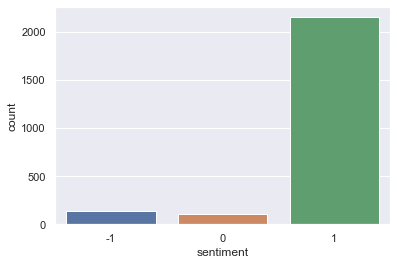

In [13]:
sns.set_theme()

# Create a visualization
sns.countplot(
    data=df,
    x="sentiment"
)

In [14]:
# initialize NLTK sentiment analyzer

analyzer = SentimentIntensityAnalyzer()


# create get_sentiment function

def get_sentiment(text):

    scores = analyzer.polarity_scores(text)

    sentiment = 1 if scores['pos'] > 0 else 0

    return scores['compound']




# apply get_sentiment function

df['review_sentiment'] = df['prep'].apply(get_sentiment)

df['review_sentiment']

/var/folders/h6/vygxj7rj5tq9z54ggx6zd6080000gn/T/ipykernel_91268/3818571148.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review_sentiment'] = df['prep'].apply(get_sentiment)


0       0.4215
1       0.5719
2       0.0000
3      -0.1027
4       0.0000
         ...  
2395    0.0000
2396    0.9477
2397    0.0000
2398    0.0000
2399    0.0000
Name: review_sentiment, Length: 2400, dtype: float64

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(strip_accents=None, 
                        lowercase=False,
                        preprocessor=None)

X = tfidf.fit_transform(df['prep'])

from sklearn.model_selection import train_test_split
y = df['sentiment'] # target variable
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [16]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train,y_train) # fit the model
preds = lr.predict(X_test) # make predictions

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(preds,y_test)

0.9016666666666666

<AxesSubplot:xlabel='published_at_date', ylabel='review_sentiment'>

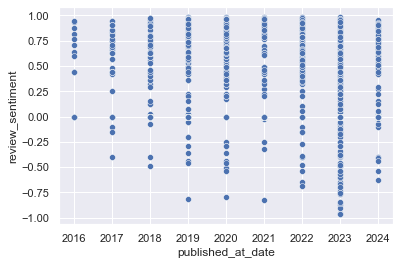

In [18]:
sns.scatterplot(data=df, x='published_at_date', y='review_sentiment')

<AxesSubplot:xlabel='published_at_date', ylabel='review_sentiment'>

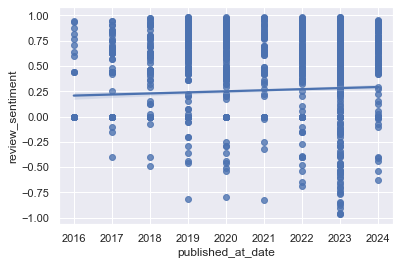

In [19]:
sns.regplot(x="published_at_date", y="review_sentiment", data=df)

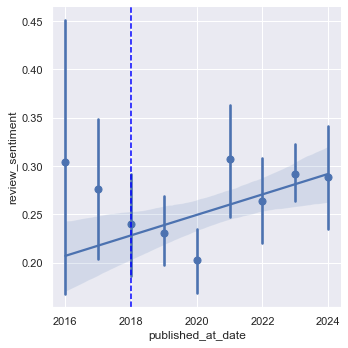

In [20]:
sns.lmplot(x="published_at_date", y="review_sentiment", data=df, x_estimator=np.mean)
plt.axvline(x=2018, color='blue', linestyle='--', label='Year 2018')

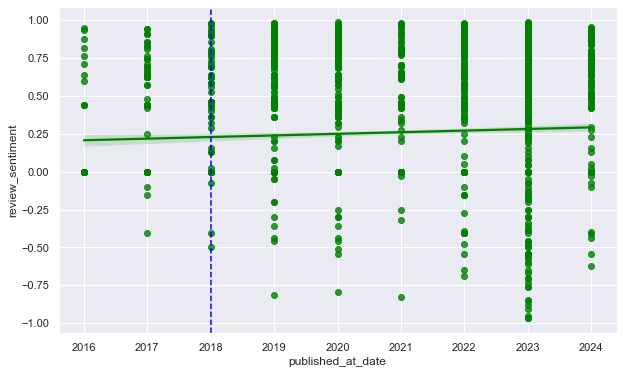

In [21]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='published_at_date', y='review_sentiment', marker='o', color='green')
plt.axvline(x=2018, color='blue', linestyle='--', label='Year 2018')

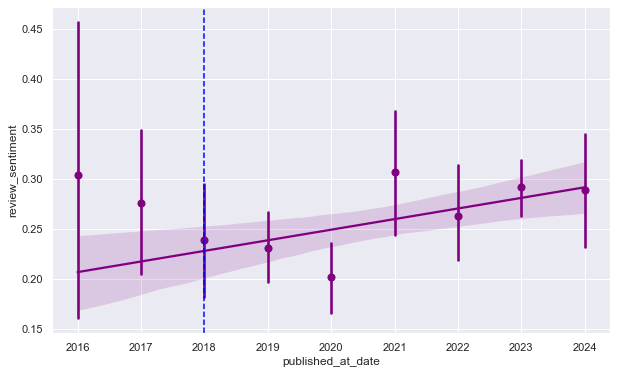

In [22]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='published_at_date', y='review_sentiment', marker='o', color='purple', x_estimator=np.mean)
plt.axvline(x=2018, color='blue', linestyle='--', label='Year 2018')

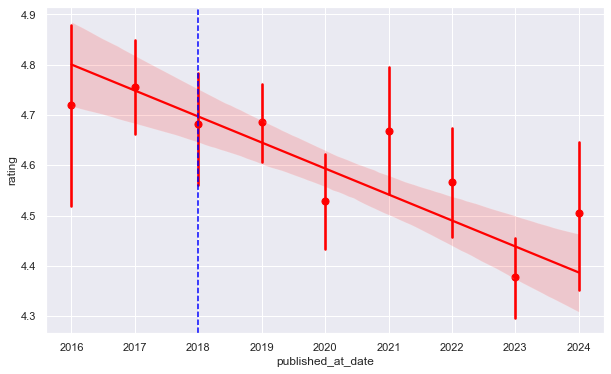

In [23]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='published_at_date', y='rating', marker='o', color='red', x_estimator=np.mean)
plt.axvline(x=2018, color='blue', linestyle='--', label='Year 2018')

In [24]:
# Wilcoxon rank-sum / Mann-whitney U Test
year = 2018

before_data = df[df['published_at_date'] < year]
after_data = df[df['published_at_date'] >= year]

u_stat, p_value_mw = mannwhitneyu(before_data['review_sentiment'], after_data['review_sentiment'])
print("Mann-Whitney U test - U-statistic:", u_stat, "p-value:", p_value_mw)

Mann-Whitney U test - U-statistic: 129518.0 p-value: 0.7060761123925193


In [27]:
# make altered data into csv file
df.to_csv('altdata/' + 'raku.csv', index=False)